In [3]:
# Importing
import theano.tensor as T
import theano
import sys, os
sys.path.append("../")

# Importing GeMpy modules
import gempy as GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  False,
                   threshold=50)
 
#%matplotlib inline
%matplotlib inline

In [4]:
"""
2 Horizontal layers with drift oen
"""
# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.import_data([0,2000,0,2000,-2000,0], [50, 50, 50],
                             path_f="./GeoModeller/test_f/test_f_Foliations.csv",
                             path_i="./GeoModeller/test_f/test_f_Points.csv")



In [7]:
geo_data.read_vox('./GeoModeller/test_f/test_f.vox')

array([5, 5, 5, ..., 'SecondarySeal', 'SecondarySeal', 'SecondarySeal'], dtype=object)

In [6]:
geo_data.set_formation_number(geo_data.formations[[3,2,1,0,4]])
geo_data.get_formation_number()

{'DefaultBasement': 0,
 'MainFault': 1,
 'NonReservoirDeep': 5,
 'Reservoir': 4,
 'Seal': 3,
 'SecondaryReservoir': 2}

In [19]:
50*50*50*0.0012

150.0

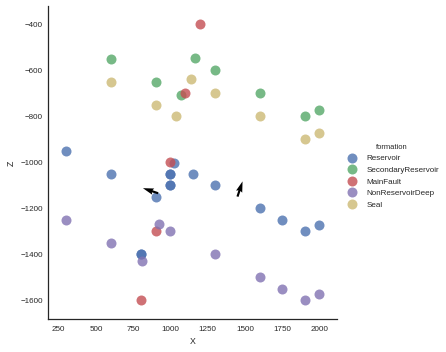

In [7]:
GeMpy.plot_data(geo_data)

In [8]:
geo_data.formations

array(['Reservoir', 'Seal', 'SecondaryReservoir', 'MainFault', 'NonReservoirDeep'], dtype=object)

In [7]:
GeMpy.set_data_series(geo_data, {'series': (
                                            'SecondaryReservoir',
                                            'Seal',
                                            'Reservoir',
                                            'NonReservoirDeep'
                                             ),
                      'fault1': 'MainFault'},
                      order_series = ['fault1', 'series'])

#geo_data = GeMpy.select_series(geo_data, ['fault1'])
#GeMpy.plot_data(geo_data)
data_interp = GeMpy.set_interpolator(geo_data,
                                     dtype="float64",
                                     verbose=[
                                         #'solve_kriging',
                                              'n_formation'
                                      #  'matrices_shapes',
                                      #         'faults block',
                                      #   'grid_val'
                                      #   "potential_field_at_interfaces",
                                      #   "potential_field_at_all",
                                      #   'n_formation',
                                          #   'faults_contribution',
                                      #       'faults_matrix'
                                     ])

[2, 2]


In [8]:
# This cell will go to the backend

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
# Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep(u_grade=[3, 3])

# Compile the theano function.
compiled_f = theano.function(input_data_T,
                             data_interp.interpolator.tg.whole_block_model(1,
                                compute_pf=1),
                             allow_input_downcast=True, profile=True)

[3, 3]


In [9]:
sol = compiled_f(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

n_formation_fault __str__ = [1]
n_formation_series __str__ = [2 3 4 5]


In [35]:
sol

array([[[ 0.      ,  0.      ,  0.      , ...,  2.      ,  2.      ,  2.      ],
        [ 0.191547,  0.197415,  0.203288, ...,  0.520723,  0.527514,  0.53421 ]]])

In [36]:
#np.save('test_f_sol', sol)

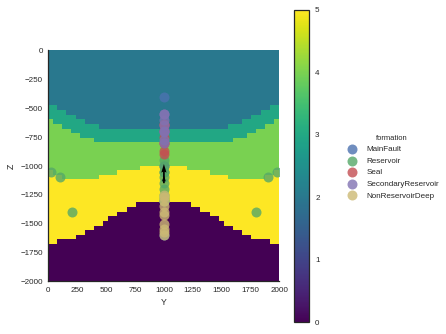

In [11]:
GeMpy.plot_section(geo_data, 25, 
                   block=sol[0,0, :], direction='x',
                   plot_data=True)
plt.colorbar()

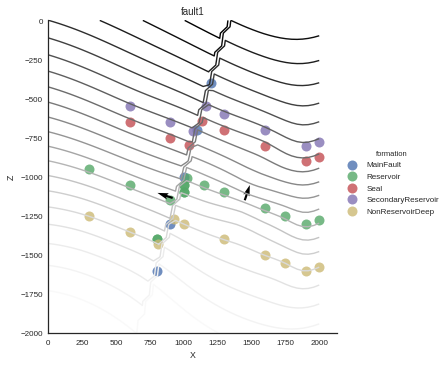

In [12]:

GeMpy.plot_potential_field(geo_data, sol[0, 1, :], 25)

In [14]:
GeoMod_sol = geo_data.read_vox('./GeoModeller/test_f/nah.vox')

In [15]:
similarity = ((GeoMod_sol-sol[0,0,:]) != 0).sum() /sol[0,0].shape[0] 

0.011664000000000001

In [33]:
np.product(sol.shape)

250000

In [27]:
np.testing.utils.assert_array_almost_equal?

In [24]:
np.testing.assert_allclose?

In [28]:
np.isclose(np.arange(10), np.arange(1,2.3,4))

array([False,  True, False, False, False, False, False, False, False, False], dtype=bool)